###### The latest version of this IPython notebook is available at [http://github.com/jckantor/CBE20255](http://github.com/jckantor/CBE20255)  for noncommercial use under terms of the [Creative Commons Attribution Noncommericial ShareAlike License](http://creativecommons.org/licenses/by-nc-sa/4.0/).

Jeffrey C. Kantor (Kantor.1@nd.edu)

# Operating Limits for a Methanol Fueled Lighter

## Problem

We'd like to estimate range of temperatures over which this methanol fueled fire starter will successfully operate.

In [16]:
from IPython.display import YouTubeVideo
YouTubeVideo("8gFqzbnUO-Y")

The flammability limits of methanol in air at 1 atmosphere pressure correspond to vapor phase mole fractions in the range

$$ 6.7 \mbox{ mol%} \leq y_{MeOH} \leq 36 \mbox{ mol%} $$

Assuming the pure methanol located in the wick of this fire starter reaches a vapor-liquid with air in the device, find the lower and upper operating temperatures for this device.

## Antoine's Equation for the Saturation Pressure of Methanol

The first thing we'll do is define a simple python function to calculate the saturation pressure of methanol at a given temperature using Antoine's equation

$$\log_{10} P^{sat} = A - \frac{B}{T + C}$$

Constants for methanol can be found in the back of the course textbook for the case where pressure is given in units of mmHg and temperature in degrees centigrade.

In [2]:
# Pressure in mmHg, Temperature in degrees C

A = 7.89750
B = 1474.08
C = 229.13

def Psat(T):
    return 10**(A - B/(T+C))

To test the function, we'll plot the saturation pressure of methanol for a limited range of temperatures.

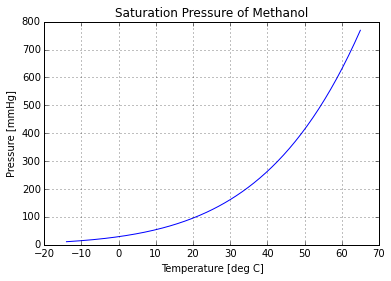

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

T = np.linspace(-14.0, 65.0, 200)

plt.plot(T,Psat(T))

plt.xlabel('Temperature [deg C]')
plt.ylabel('Pressure [mmHg]')
plt.title('Saturation Pressure of Methanol')
plt.grid()

## Equilibrium Vapor Composition at Room Temperature

By Dalton's law, the partial pressure of pure methanol is equal to the saturation pressure,

$$y_{MeOH} P = P^{sat}_{MeOH}(T)$$

Solving for the mole fraction of methanol in the vapor phase

$$y_{MeOH} = \frac{P^{sat}_{MeOH}(T)}{P}$$


In [4]:
print "Methanol Vapor Pressure at 25 deg C =", 
print Psat(25.0),
print "mmHg"

Methanol Vapor Pressure at 25 deg C = 125.027109478 mmHg


At atmospheric pressure of 760 mmHg, the mole fraction of methanol is given by

In [5]:
print "Mole Fraction Methanol at 25 deg C and 1 atmosphere = ",
print Psat(25.0)/760.0

Mole Fraction Methanol at 25 deg C and 1 atmosphere =  0.164509354576


Since this is within the flammability limits of methanol, the fire starter should work at room temperatures.

## Lower Operating Temperature Limit

At the lower flammability limit, the partial pressure of methanol will be

$$P_{MeOH} = y_{MeOH}P$$

In [6]:
P_MeOH = 0.067*760
print P_MeOH, "mm Hg"

50.92 mm Hg


Next we need to solve for the temperature at which the partial pressure of methanol is at the lower flammability limit.

$$P^{sat}_{MeOH}(T) = P_{MeOH}$$

We'll first attempt a solution by trial and error, then we'll use an equation solve to get an accurate solution.  Let's start with a guess of 15 deg C.

In [7]:
print Psat(15.0), "mmHg"

72.3445037836 mmHg


That's too high. Let's try some more values

In [8]:
print Psat(10.0), "mmHg"

54.0946414618 mmHg


In [9]:
print Psat(5.0), "mmHg"

39.9494304822 mmHg


In [10]:
print Psat(7.5), "mmHg"

46.5615927804 mmHg


In [11]:
print Psat(8.75), "mmHg"

50.2067545772 mmHg


In [12]:
print Psat(9.0), "mmHg"

50.9645007148 mmHg


So $T = 9$ deg C is pretty close.  To get a precise answer, use the `brentq` equation solving function from `scipy.optimize`.

In [14]:
from scipy.optimize import brentq

def f(T):
    return Psat(T) - P_MeOH

Tlow = brentq(f,5,15)
print "Lower Flammability Temperature = ", Tlow, "deg C"
print "Lower Flammability Temperature = ", 32.0 + 9.0*Tlow/5.0, "deg F"

Lower Flammability Temperature =  8.98540669181 deg C
Lower Flammability Temperature =  48.1737320453 deg F


## Exercise

Calculate the upper limit on temperature at which this lighter can operate.